In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from scipy import stats
import statsmodels.stats.multitest as multi
%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

In [2]:
df_listings = pd.read_csv('C:/Users/ryanv/OneDrive/Desktop/Seattle_airbnb_data/listings.csv')

In [3]:
df_listings.shape

(3818, 92)

# Step 1: Business Understanding

#### In this project we are interested in using the Airbnb Seattle Open Dataset to 
#### predict listing prices and total monthly revenue for listings. This is very valuable
#### for Airbnb because it is essential that each listing is priced accurately

## Question 1: Can we predict listing prices with a lasso model?

## Question 2: What features have the strongest effect for predicting prices?

## Question 3: Can we predict listing monthly revenue with a lasso model?

## Question 4: What features have the strongest effect for predicting monthly revenue?

# Step 2: Data Understanding

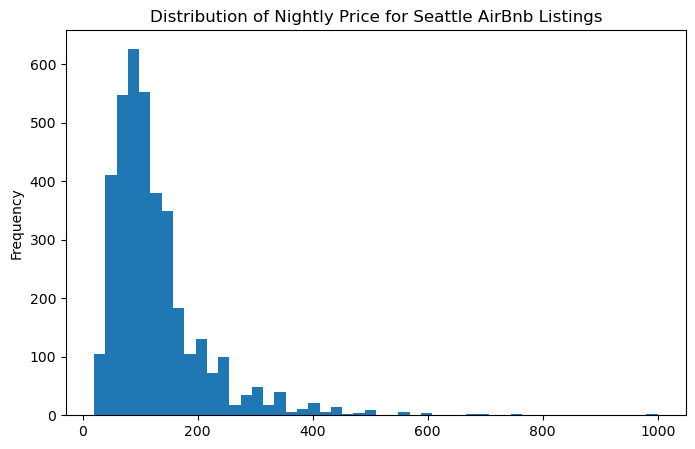

In [33]:
#visualize the distribtion of nightly price / target variable
#df_listings['price'] = df_listings['price'].astype("float32")
#df_listings.price.hist(bins=100);
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
df_listings.price.plot(kind = "hist", bins=50)
plt.title("Distribution of Nightly Price for Seattle AirBnb Listings")
plt.show()

In [5]:
# Examining the distribution of price above it looks like the majority of values fall between 0 and 200 with some 
# outliers on the right

In [34]:
# Lets take a look at our data:
df_listings.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_since_deltaDays,last_review_deltaDays,first_review_deltaDays,host_verificationCount,Estimated_bookings,Estimated_monthly_revenue
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,956883,Maija,8/11/2011,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",12.0,96.0,100%,f,Queen Anne,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,...,41,71,346,207,11/1/2011,1/2/2016,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,1,f,f,2,4.07,1607.0,2.0,1525.0,4,2.035,172.975
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",5177328,Andrea,2/21/2013,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,1.0,98.0,100%,t,Queen Anne,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,...,13,16,291,43,8/19/2013,12/29/2015,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,0,t,t,6,1.48,1047.0,6.0,868.0,6,0.740,111.000
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,6/12/2014,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,12.0,67.0,100%,f,Queen Anne,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,...,6,17,220,20,7/30/2014,9/3/2015,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,0,f,f,2,1.15,571.0,123.0,523.0,5,0.575,560.625
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,9851441,Emily,11/6/2013,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,Queen Anne,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,...,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,f,f,1,NaN,789.0,NaN,NaN,5,NaN,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,1452570,Emily,11/29/2011,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",1.0,100.0,NaN,f,Queen Anne,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,...,60,90,365,38,7/10/2012,10/24/2015,92.0,9.0,9.0,10

In [35]:
# Lets also take a look at a list of our columns and the associated data type of each:

df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   object 
 1   name                              3818 non-null   object 
 2   summary                           3641 non-null   object 
 3   space                             3249 non-null   object 
 4   description                       3818 non-null   object 
 5   neighborhood_overview             2786 non-null   object 
 6   notes                             2212 non-null   object 
 7   transit                           2884 non-null   object 
 8   host_id                           3818 non-null   object 
 9   host_name                         3816 non-null   object 
 10  host_since                        3816 non-null   object 
 11  host_location                     3810 non-null   object 
 12  host_a

In [36]:
#Looking through the columns looks like there is a lot of text data that will need to be manipulated and cleaned!!

In [37]:
# Lets also take a look at the size of our dataset

num_rows = df_listings.shape[0] #Provide the number of rows in the dataset
num_cols = df_listings.shape[1] #Provide the number of columns in the dataset

print(num_rows, num_cols)

3818 78


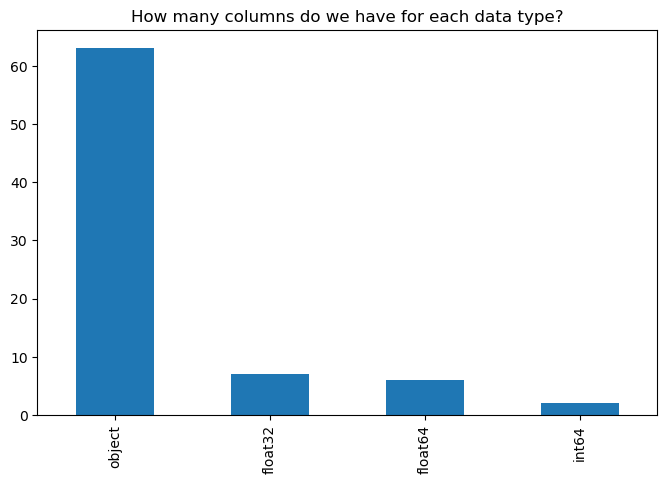

In [38]:
# Lets take a look at the number of columns we have for each data type

df_listings.dtypes.value_counts().plot(kind="bar")
plt.title("How many columns do we have for each data type?");

In [39]:
# Looks like most of our data is string. We will need to one hot encode some of this data for categorical model features 
# And some of this text data will be dropped as it is not useful for training a statistical model

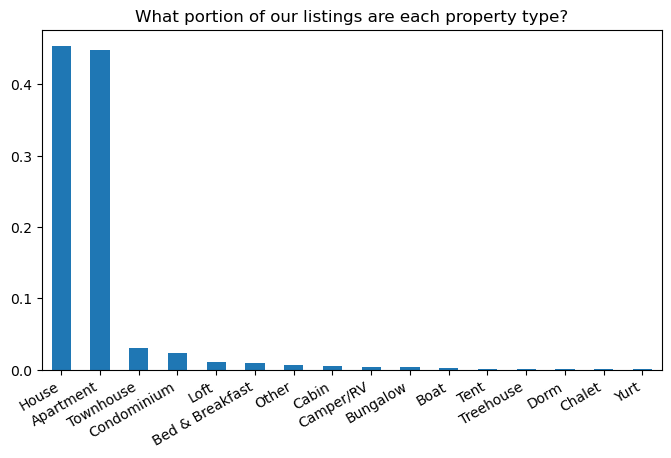

In [40]:
# I want to examine the portion of our data that is each property type as this is likely to be an important factor!

status_vals = df_listings.property_type.value_counts()#Provide a pandas series of the counts for each property type

fig, ax = plt.subplots()
(status_vals/df_listings.shape[0]).plot(kind="bar");
ax.figure.autofmt_xdate()
plt.title("What portion of our listings are each property type?");

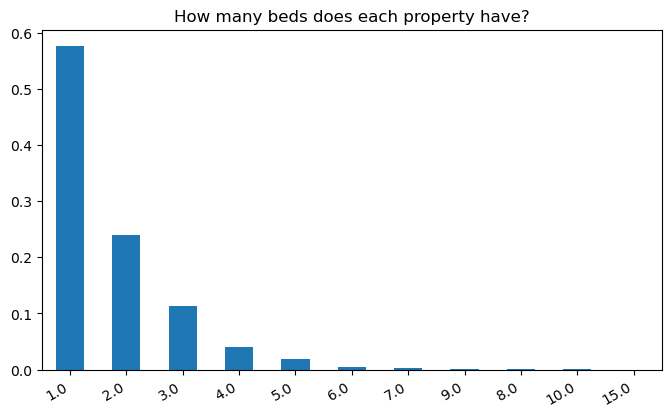

In [41]:
# I want to examine the portion of our data that is each property type as this is likely to be an important factor!

status_vals = df_listings.beds.value_counts()#Provide a pandas series of the counts for each property type

fig, ax = plt.subplots()
(status_vals/df_listings.shape[0]).plot(kind="bar");
ax.figure.autofmt_xdate()
plt.title("How many beds does each property have?");

In [42]:
# I am surprised by the amount of listings with only one bed as many customers look at airbnb as an option for groups!

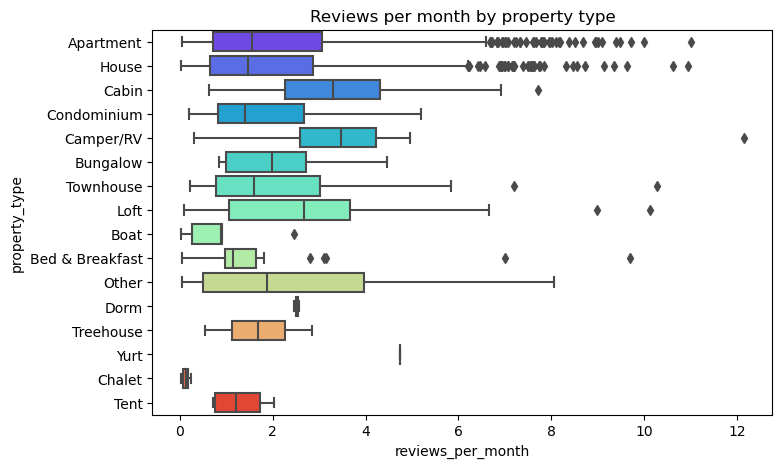

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='reviews_per_month',y='property_type',data=df_listings, palette='rainbow')
plt.title("Reviews per month by property type");

#Below we are taking a look at reviews per month based on property type
#For generating high monthly revenue for a property it is very important that it is being booked often
#We use reviews per month with an adjustment to estimate bookings per month per property
#It is very interesting to note that there are many Apartments and homes with outliers in booking frequency
#It is also surprising that the median Apartment and Home is only reviewed about twice per month

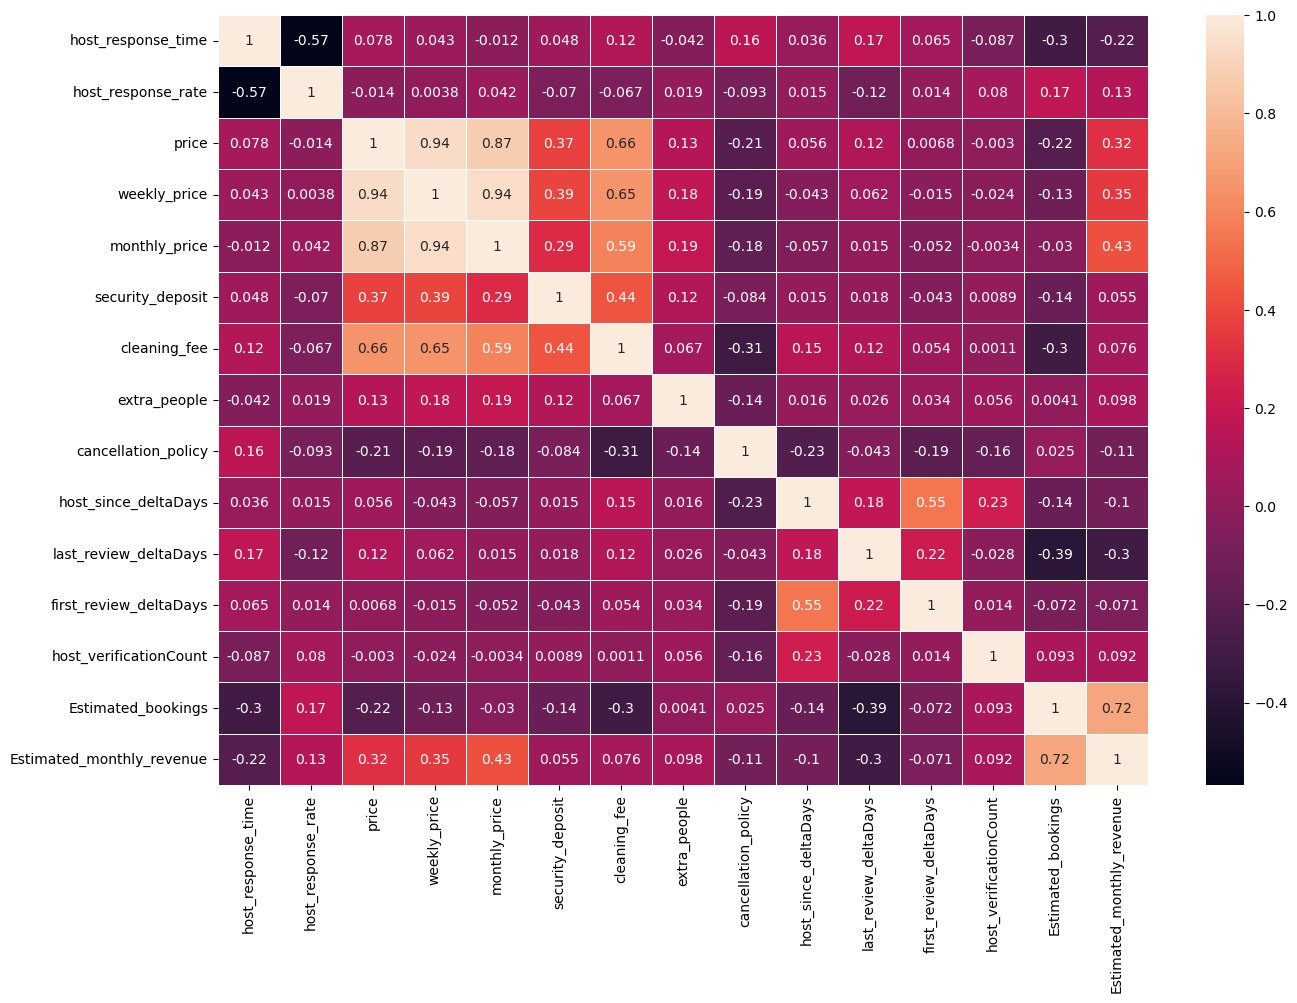

In [44]:
# Lets take a look at the correlation between numerical variables to look for multicollinearity. This is something we
# need to be aware of when fitting the model.

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df_listings.corr(), annot=True, linewidth=.50);

In [17]:
# With the exception of a very strong relationship between price and weekly and monthly price I would say for the most part
# our numerical variables have relatively low correlation to each other

# Step 3: Data Preparation

In [18]:
# Retrieve the creation date of the dataframe for feature engineering
df_listing_last_scraped = pd.Timestamp(df_listings.at[0,'last_scraped'])

# Drop duplicate columns
df_listings = df_listings.T.drop_duplicates().T

# Drop columns with full NA
df_listings.dropna(axis=1,how="all",inplace=True)

# Drop columns with only one unique value
df_listings.drop([c for c in df_listings.columns if df_listings[c].nunique()==1],axis=1,inplace=True)

# Drop columns representing url
df_listings.drop(df_listings.columns[df_listings.columns.str.contains("url")],axis=1,inplace=True)

# Reformat the money related columns
df_listings.price = df_listings.price.str.replace(r"$","").str.replace(",","").astype("float32");
df_listings.weekly_price = df_listings.weekly_price.str.replace(r"$","").str.replace(",","").astype("float32");
df_listings.monthly_price = df_listings.monthly_price.str.replace(r"$","").str.replace(",","").astype("float32");
df_listings.security_deposit = df_listings.security_deposit.str.replace(r"$","").str.replace(",","").astype("float32");
df_listings.cleaning_fee = df_listings.cleaning_fee.str.replace(r"$","").str.replace(",","").astype("float32");
df_listings.extra_people = df_listings.extra_people.str.replace(r"$","").str.replace(",","").astype("float32");

# Transform the date related columns
df_listings['host_since_deltaDays'] = (pd.to_datetime(df_listing_last_scraped)-pd.to_datetime(df_listings.host_since)).dt.days
df_listings['last_review_deltaDays'] = (pd.to_datetime(df_listing_last_scraped)-pd.to_datetime(df_listings.last_review)).dt.days
df_listings['first_review_deltaDays'] = (pd.to_datetime(df_listing_last_scraped)-pd.to_datetime(df_listings.first_review)).dt.days


# Reformat other features
df_listings['host_response_time'] = df_listings.host_response_time.map({"within an hour":1,"within a few hours":12,\
                                                                        "within a day":24,"a few days or more":48})
df_listings.host_response_rate = df_listings.host_response_rate.str.replace("%","").astype("float32")
df_listings['cancellation_policy'] = df_listings['cancellation_policy'].map({'strict':0,'moderate':1,'flexible':2})

# Create a feature count the number of host verification methods
host_verifications = np.unique(np.concatenate(df_listings.host_verifications.map(lambda x:x[1:-1].replace("'","").split(", "))))[1:]
matrix_verifications=[[veri in row for row in df_listings.host_verifications.map(lambda x:x[1:-1].replace("'","").split(", ")) ] for veri in host_verifications]
df_listings['host_verificationCount'] = pd.DataFrame(matrix_verifications,index=host_verifications).T.sum(1)

In [19]:
df_listings.shape

(3818, 76)

In [20]:
def add_target_columns(df_listings):
    """
    This function adds the target columns Estimated_bookings and Estimated_monthly_revenue to the dataframe.
    
    Parameters:
    df_listings : Dataframe of listings data
    
    Returns:
    df_listings : Dataframe of listings data with added target columns
    
    """
    df_listings['Estimated_bookings'] = df_listings.reviews_per_month.astype('float') * .50
    df_listings['Estimated_monthly_revenue'] = df_listings['Estimated_bookings'] * df_listings['price']
    
    return df_listings
    

In [21]:
df_listings = add_target_columns(df_listings)

In [22]:
#Manually filter the dataset for relevant features

features_host = ['host_is_superhost','host_about','host_response_time','host_response_rate', 'host_listings_count',
                 'host_verificationCount','host_has_profile_pic','host_identity_verified','host_since_deltaDays',\
                 'calculated_host_listings_count']

features_property = ['summary','space','description','neighborhood_overview','notes','transit',
                     'street','neighbourhood','zipcode','latitude','longitude','is_location_exact',
                     'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type',
                     'amenities','square_feet','price','weekly_price','security_deposit','cleaning_fee',
                     'guests_included','extra_people','minimum_nights','maximum_nights']

features_traveler = ['number_of_reviews','last_review_deltaDays','first_review_deltaDays','review_scores_rating',
                     'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                     'review_scores_location','review_scores_value','instant_bookable','cancellation_policy',\
                     'require_guest_profile_picture','require_guest_phone_verification','reviews_per_month']

features = features_host + features_property + features_traveler + ['Estimated_bookings', 'Estimated_monthly_revenue']
df_listings_filtered = df_listings[features]

In [23]:
#Prepare features for machine learning model by converting to the correct data types

numeric_feature = ['host_listings_count','calculated_host_listings_count','latitude','longitude','accommodates','bathrooms',
                   'bedrooms','beds','guests_included','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating',
                   'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                   'review_scores_location','review_scores_value', 'review_scores_rating' ,'review_scores_accuracy',
                   'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
                   'review_scores_value' ,'reviews_per_month'] 

bool_feature = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable',
                'require_guest_phone_verification','require_guest_profile_picture']

# Transform the bool features
for bool_f in bool_feature:
    df_listings_filtered[bool_f] = df_listings_filtered[bool_f].map({'t':1,'f':0}).astype('bool')

# Transform the numerical features
for num_f in numeric_feature:
    df_listings_filtered[num_f] = df_listings_filtered[num_f].astype("float32")

In [24]:
# Fix the weird zipcode value
df_listings_filtered.zipcode[df_listings_filtered.zipcode=="99\n98122"] = 98122
# Drop column square_feet for containing too many NA values (97.5%)
df_listings_filtered.square_feet.isna().mean()
df_listings_filtered.drop("square_feet",axis=1,inplace=True)

In [25]:
#Get list of unique amenities to one hot encode into model inputs

unique_amenities = np.unique(np.concatenate(df_listings_filtered.amenities.str[1:-1].str.replace('"','')
                                            .str.split(",")))[1:]
print(unique_amenities)

['24-Hour Check-in' 'Air Conditioning' 'Breakfast'
 'Buzzer/Wireless Intercom' 'Cable TV' 'Carbon Monoxide Detector' 'Cat(s)'
 'Dog(s)' 'Doorman' 'Dryer' 'Elevator in Building' 'Essentials'
 'Family/Kid Friendly' 'Fire Extinguisher' 'First Aid Kit'
 'Free Parking on Premises' 'Gym' 'Hair Dryer' 'Hangers' 'Heating'
 'Hot Tub' 'Indoor Fireplace' 'Internet' 'Iron' 'Kitchen'
 'Laptop Friendly Workspace' 'Lock on Bedroom Door' 'Other pet(s)'
 'Pets Allowed' 'Pets live on this property' 'Pool' 'Safety Card'
 'Shampoo' 'Smoke Detector' 'Smoking Allowed' 'Suitable for Events' 'TV'
 'Washer' 'Washer / Dryer' 'Wheelchair Accessible' 'Wireless Internet']


In [26]:
matrix_amenities=[[amen in row for row in df_listings_filtered.amenities.str[1:-1].str.replace('"','').
                   str.split(",") ] for amen in unique_amenities]
df_amenities = pd.DataFrame(matrix_amenities,index=unique_amenities).T

# Drop amenities features appear in less than 5% of samples to avoid overfitting
df_amenities.drop(df_amenities.columns.values[np.where(df_amenities.mean()<0.05)],axis=1,inplace=True)
df_listings_filtered_amenities = pd.concat([df_listings_filtered,df_amenities],axis=1)

In [27]:
#Calculate and view the percantage of null values for each column

print(df_listings_filtered_amenities.isna().mean().sort_values(ascending=False).head(35))

security_deposit               0.511262
weekly_price                   0.473808
notes                          0.420639
neighborhood_overview          0.270299
cleaning_fee                   0.269775
transit                        0.244631
host_about                     0.224987
review_scores_accuracy         0.172342
review_scores_checkin          0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
Estimated_bookings             0.164222
last_review_deltaDays          0.164222
reviews_per_month              0.164222
first_review_deltaDays         0.164222
Estimated_monthly_revenue      0.164222
space                          0.149031
host_response_rate             0.136983
host_response_time             0.136983
neighbourhood                  0.108958
summary                        0.046359
bathrooms                      0.004191


In [28]:
# Final round of data cleaning before we are ready to model!

df_listings_filtered_amenities_cleaned = df_listings_filtered_amenities.copy()

# Fill NA for numeric features
df_listings_filtered_amenities_cleaned.zipcode = df_listings_filtered_amenities_cleaned.zipcode.fillna(
                                                df_listings_filtered_amenities_cleaned.zipcode.mode()[0])
feature_fillna_median = ['host_response_time','host_response_rate','security_deposit','cleaning_fee','weekly_price','bedrooms',
                         'bathrooms','review_scores_rating','review_scores_communication','review_scores_cleanliness','review_scores_location',
                         'review_scores_value','review_scores_accuracy','review_scores_checkin', 'beds', 'host_listings_count',
                         'host_since_deltaDays', 'last_review_deltaDays', 'first_review_deltaDays', 'reviews_per_month'
                        ]
df_listings_filtered_amenities_cleaned[feature_fillna_median] = df_listings_filtered_amenities_cleaned[feature_fillna_median].fillna(
                                                                df_listings_filtered_amenities_cleaned[feature_fillna_median].median())

# Fill NA for object features
feature_fillna_empty =  ['summary','neighbourhood','space','host_about','transit','neighborhood_overview','notes']
df_listings_filtered_amenities_cleaned[feature_fillna_empty] = df_listings_filtered_amenities_cleaned[feature_fillna_empty].fillna('')

# Numerical features
df_num = df_listings_filtered_amenities_cleaned.select_dtypes(exclude='object')
# One hot encoding categorical features
df_cat = pd.get_dummies(df_listings_filtered_amenities_cleaned.select_dtypes(include='object')[['property_type','room_type', 'bed_type']])
# Drop one hot categorical feature columns appearing less then 5% of samples
catFeatureToDrop = df_cat.columns.where(df_cat.mean()<0.05).dropna()
df_cat.drop(catFeatureToDrop,axis=1,inplace=True)
df_cat = df_cat.astype("bool")
df_total = pd.concat([df_num,df_cat],axis=1)




# Step 4: Data Modeling

### Question 1: Can we predict prices with a lasso model?

In [29]:
# Fit ridge regression model for predicting price

X = df_total.drop(['weekly_price','price','Estimated_bookings','Estimated_monthly_revenue'],axis=1)
y = df_total.price
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 10,100],scoring='r2').fit(X, y)
print("r2 score:{:.3f}".format(clf.score(X,y)))

r2 score:0.595


# Step 5: Evaluate the results

### Question 2: What features are most important for predicting prices?

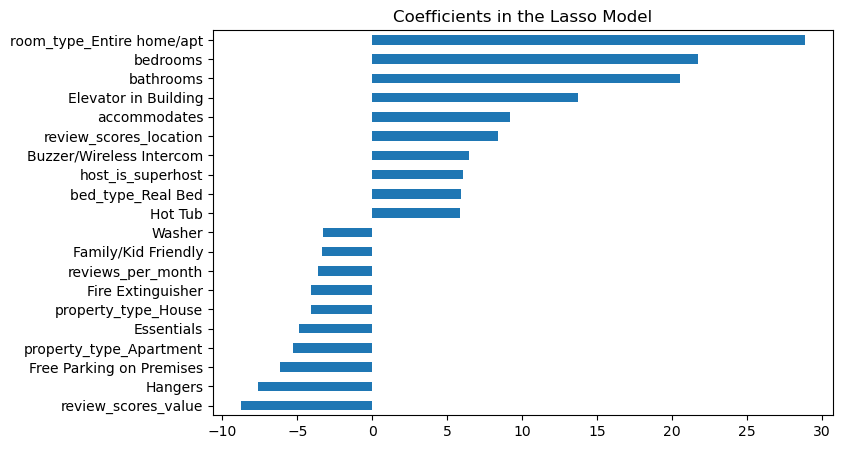

In [30]:
# Visualize coefficient of the ridge regression model

coef = pd.Series(clf.coef_, index = X.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

# Data Modeling Part 2

### Question 3: Can we predict monthly revenue with a lasso model?

In [31]:
# Fit ridge regression model for predicting monthly revenue

df_total = df_total[df_total['Estimated_monthly_revenue'].notna()]

X = df_total.drop(['weekly_price','price','Estimated_bookings','reviews_per_month','Estimated_monthly_revenue'],axis=1)
y = df_total.Estimated_monthly_revenue
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 10,100],scoring='r2').fit(X, y)
print("r2 score:{:.3f}".format(clf.score(X,y)))

r2 score:0.476


# Evaluate the Results

### Question 4: What features are most important for predicting monthly revenue?

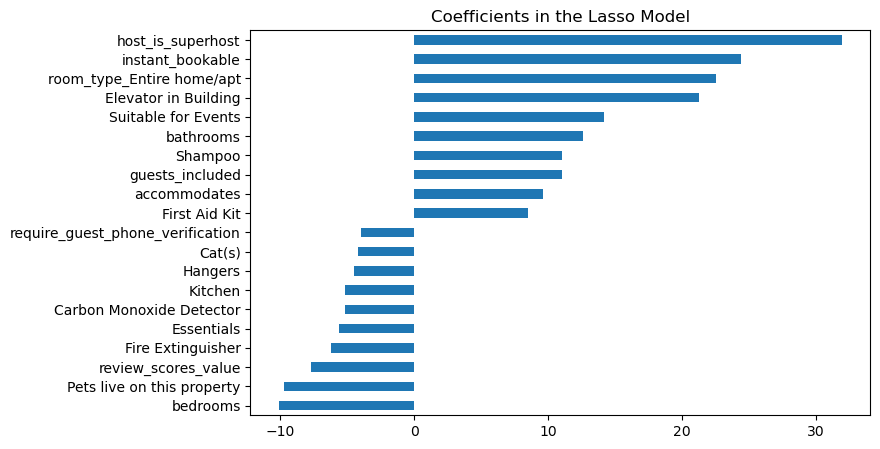

In [32]:
# Visualize coefficient of the ridge regression model

coef = pd.Series(clf.coef_, index = X.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()